# Segmenatacion de imagenes 

### Librerias

In [1]:
#import torch
#import torchvision
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
from rembg import remove

# Experimentacion 



# procesos de segmentacion 

## Eliminación de Fondos en Imágenes Usando rembg

In [2]:
def remove_background_and_generate_masks(input_image_path, background_color=(128, 0, 128)):
    try:
        # Cargar la imagen
        with Image.open(input_image_path) as img:
            # Eliminar el fondo
            img_no_bg = remove(img)
            
            # Crear un fondo de color sólido
            bg_color = Image.new("RGBA", img_no_bg.size, background_color)
            img_with_bg = Image.alpha_composite(bg_color, img_no_bg)
            
            
            # Crear una máscara binaria
            grayscale = img_no_bg.convert("L")  # Convertir a escala de grises
            mask = grayscale.point(lambda p: p > 0 and 255)  # Crear máscara binaria
            return img, img_with_bg, mask
    
    except Exception as e:
        print(f"Error al procesar la imagen: {str(e)}")
        return None, None, None

def display_images(original, processed, mask):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    
    ax1.imshow(original)
    ax1.set_title('Imagen Original')
    ax1.axis('off')
    
    ax2.imshow(processed)
    ax2.set_title('Fondo Removido')
    ax2.axis('off')
    
    ax3.imshow(mask, cmap='gray')
    ax3.set_title('Máscara')
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()

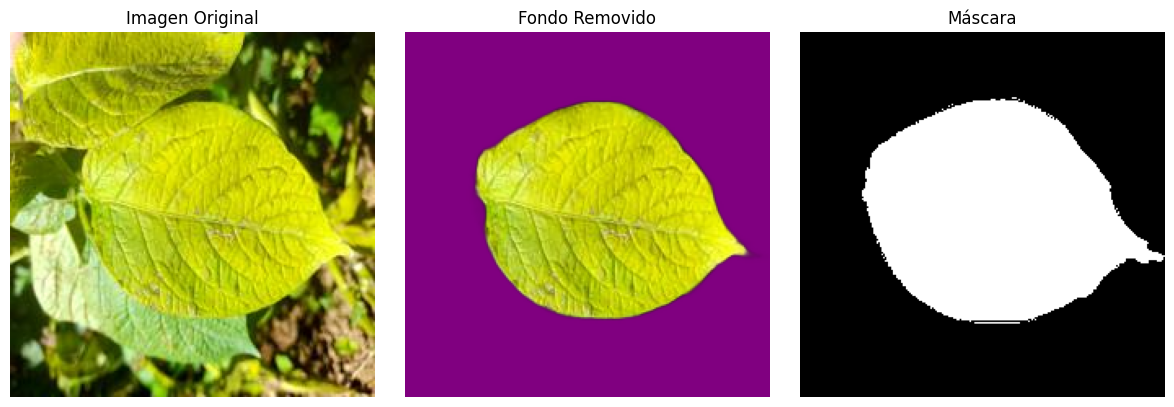

In [3]:
input_image_path = '../data/processed/preprocessed_potato_leaf/Daños por nematodos/imagen_0005.jpg'

# Procesar las imágenes
original, processed, mask = remove_background_and_generate_masks(input_image_path)

# Mostrar las imágenes
if original and processed and mask:
    display_images(original, processed, mask)
else:
    print("No se pudieron procesar las imágenes correctamente.")

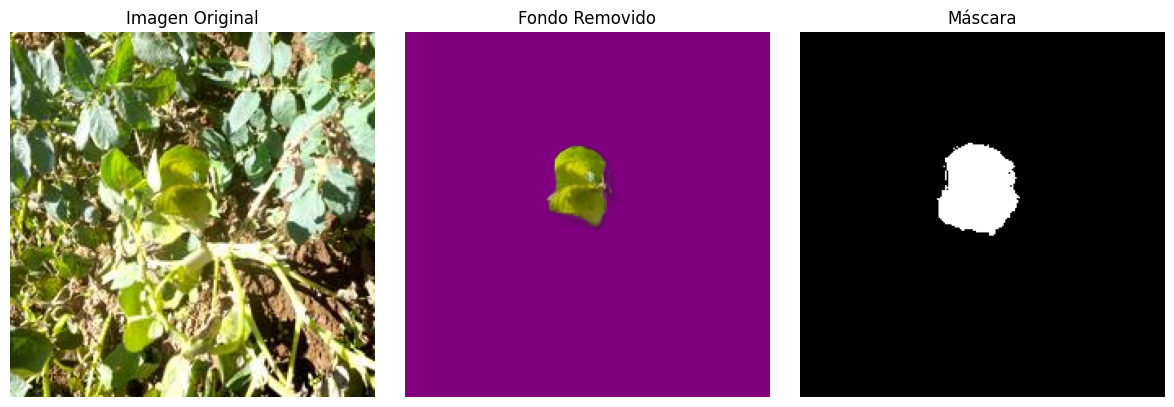

In [4]:
input_image_path = '../data/processed/preprocessed_potato_leaf/Daños por nematodos/imagen_0001.jpg'


# Procesar las imágenes
original, processed, mask = remove_background_and_generate_masks(input_image_path)

# Mostrar las imágenes
if original and processed and mask:
    display_images(original, processed, mask)
else:
    print("No se pudieron procesar las imágenes correctamente.")

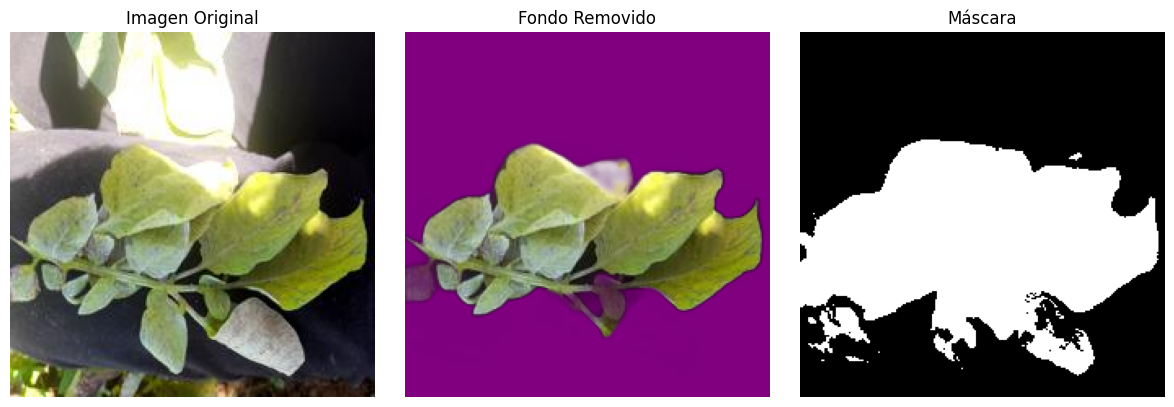

In [5]:
input_image_path = '../data/processed/preprocessed_potato_leaf/Daños por nematodos/imagen_0002.jpg'


# Procesar las imágenes
original, processed, mask = remove_background_and_generate_masks(input_image_path)

# Mostrar las imágenes
if original and processed and mask:
    display_images(original, processed, mask)
else:
    print("No se pudieron procesar las imágenes correctamente.")

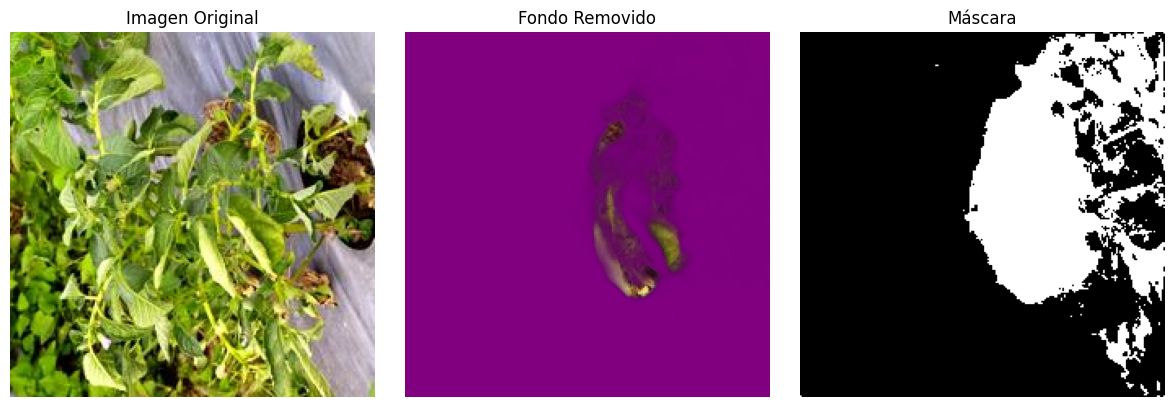

In [6]:
input_image_path = '../data/processed/preprocessed_potato_leaf/Enfermedades bacterianas/imagen_0002.jpg'
# Procesar las imágenes
original, processed, mask = remove_background_and_generate_masks(input_image_path)

# Mostrar las imágenes
if original and processed and mask:
    display_images(original, processed, mask)
else:
    print("No se pudieron procesar las imágenes correctamente.")

## Función para segmentar la imagen basada en los rangos de color HSV.

#### version_1

In [7]:
# Función para mostrar imágenes
def mostrar_imagen(titulos, imagenes):
    fig, axs = plt.subplots(1, len(imagenes), figsize=(15, 5))  # Crear una fila con tantas imágenes como se necesiten
    for i, (titulo, imagen) in enumerate(zip(titulos, imagenes)):
        axs[i].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
        axs[i].set_title(titulo)
        axs[i].axis('off')  # Ocultar los ejes
    plt.show()

# Función estratégica para aplicar segmentación de colores
def segmentar_colores(imagen_ruta, rangos_colores):
    
    imagen = cv2.imread(imagen_ruta)

    # Convertir la imagen a espacio de color HSV
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    
    resultados = {}
    mascaras = []
    
    titulos = ["Imagen Original"]
    imagenes = [imagen]

    # Iterar sobre los rangos de color
    for nombre_mascara, (bajo, alto) in rangos_colores.items():
        # Crear la máscara 
        mascara = cv2.inRange(imagen_hsv, np.array(bajo), np.array(alto))
        mascaras.append(mascara)
        
        # Aplicar la máscara sobre la imagen original
        resultado = cv2.bitwise_and(imagen, imagen, mask=mascara)
        
        resultados[nombre_mascara] = resultado
        
        titulos.append(f'Resultado {nombre_mascara}')
        imagenes.append(resultado)

    # Combinar todas las máscaras
    mascara_combinada = mascaras[0]
    for mascara in mascaras[1:]:
        mascara_combinada = cv2.bitwise_or(mascara_combinada, mascara)
    
    # Aplicar la máscara combinada sobre la imagen original
    resultado_combinado = cv2.bitwise_and(imagen, imagen, mask=mascara_combinada)
    
    resultados["combinado"] = resultado_combinado

    titulos.append("Resultado Combinado")
    imagenes.append(resultado_combinado)

    # Mostrar todas las imágenes en una fila
    mostrar_imagen(titulos, imagenes)
    
    return resultados

In [8]:
# Definir los rangos de colores (en formato HSV)
rangos_colores = {
    "hoja_verde": [(35, 40, 40), (70, 255, 255)],    # Rango para las hojas verdes
    "mancha_marron": [(10, 190, 50), (200, 255, 255)] # Rango para las manchas marrones
}

#### se puede observar que para las enfermedades bacterianas esta verion funciona mejor 

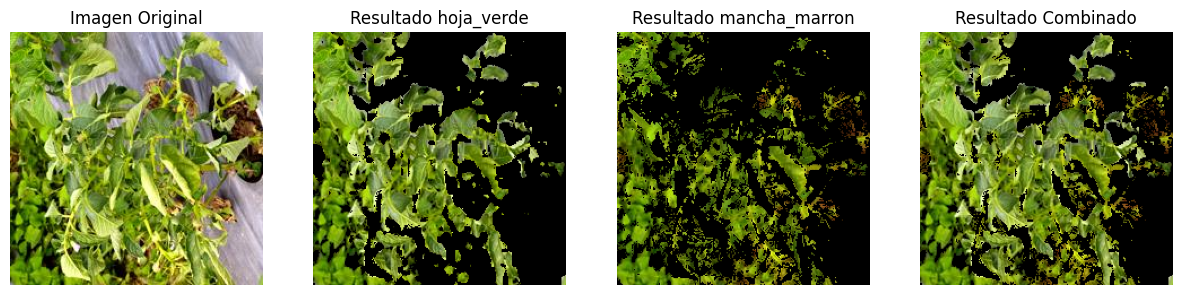

In [9]:
# Usar la función con una imagen de ejemplo
ruta_imagen = '../data/processed/preprocessed_potato_leaf/Enfermedades bacterianas/imagen_0002.jpg'
resultados = segmentar_colores(ruta_imagen, rangos_colores)

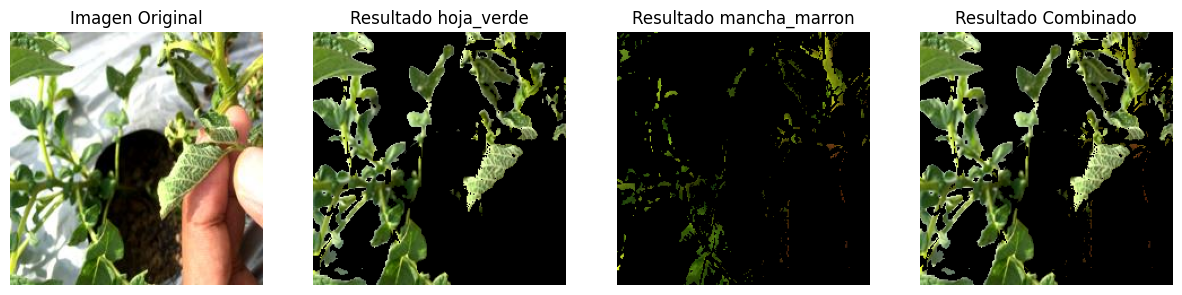

In [10]:
input_image_path ='../data/processed/preprocessed_potato_leaf/Enfermedades bacterianas/imagen_1135.jpg'
resultados = segmentar_colores(input_image_path , rangos_colores)


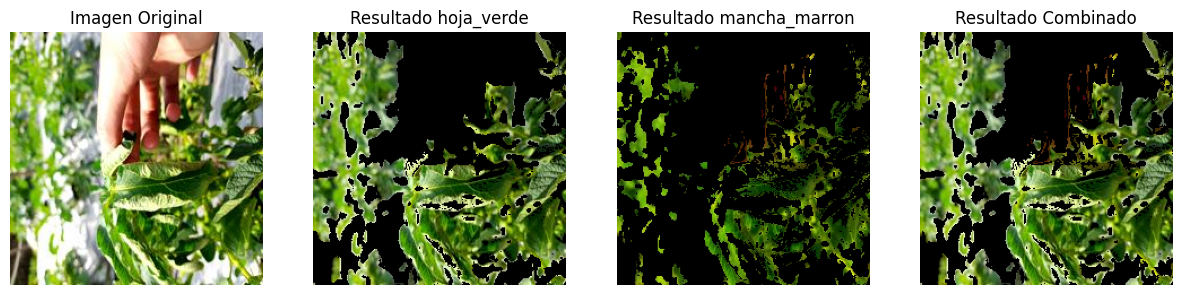

In [11]:
input_image_path ='../data/processed/preprocessed_potato_leaf/enfermedades bacterianas/imagen_0115.jpg'
resultados = segmentar_colores(input_image_path , rangos_colores)

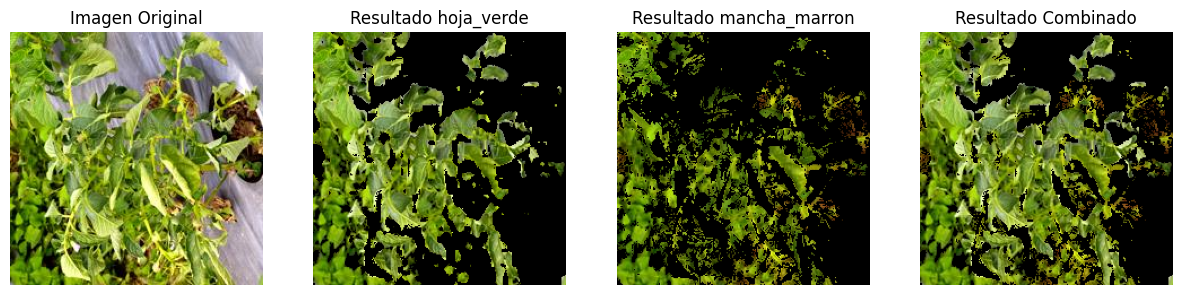

In [12]:
# Usar la función con una imagen de ejemplo
ruta_imagen = '../data/processed/preprocessed_potato_leaf/Enfermedades bacterianas/imagen_0002.jpg'
resultados = segmentar_colores(ruta_imagen, rangos_colores)

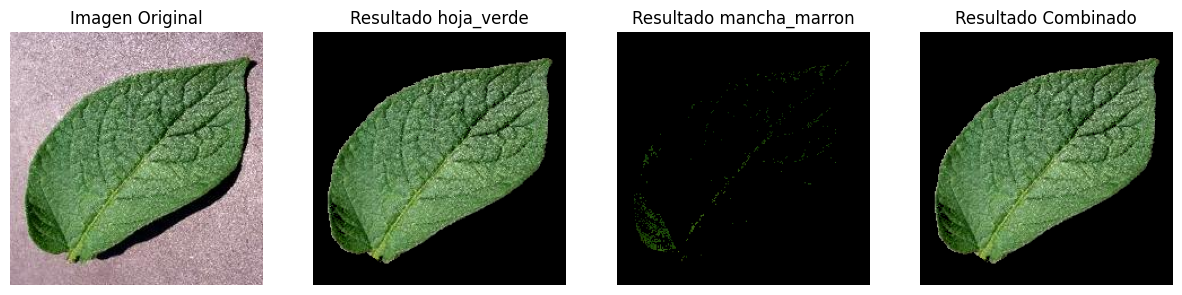

In [13]:
# Usar la función con una imagen de ejemplo
ruta_imagen = '../data/processed/preprocessed_potato_leaf/salud/imagen_0002.jpg'
resultados = segmentar_colores(ruta_imagen, rangos_colores)

#### version_2

In [14]:

def segmentar_colores(imagen_ruta, rangos_colores):
    # Cargar la imagen usando PIL
    imagen_pil = Image.open(imagen_ruta)
    
    # Convertir la imagen PIL a un array numpy compatible con OpenCV
    imagen = cv2.cvtColor(np.array(imagen_pil), cv2.COLOR_RGB2BGR)
    
    # Convertir la imagen a espacio de color HSV
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    
    resultados = {}
    mascaras = []
    
    titulos = ["Imagen Original"]
    imagenes = [imagen]

    for nombre_mascara, rangos in rangos_colores.items():
        mascara_combinada = np.zeros(imagen.shape[:2], dtype=np.uint8)
        for bajo, alto in rangos:
            mascara = cv2.inRange(imagen_hsv, np.array(bajo), np.array(alto))
            mascara_combinada = cv2.bitwise_or(mascara_combinada, mascara)
        
        # Aplicar operaciones morfológicas más agresivas
        kernel = np.ones((5,5), np.uint8)
        mascara_clean = cv2.morphologyEx(mascara_combinada, cv2.MORPH_OPEN, kernel)
        mascara_clean = cv2.morphologyEx(mascara_clean, cv2.MORPH_CLOSE, kernel)
        
        mascaras.append(mascara_clean)
        
        resultado = cv2.bitwise_and(imagen, imagen, mask=mascara_clean)
        resultados[nombre_mascara] = resultado
        
        titulos.append(f'Resultado {nombre_mascara}')
        imagenes.append(resultado)

    mascara_total = np.zeros(imagen.shape[:2], dtype=np.uint8)
    for mascara in mascaras:
        mascara_total = cv2.bitwise_or(mascara_total, mascara)
    
    # Filtrar puntos blancos
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    _, mascara_no_blanco = cv2.threshold(imagen_gris, 230, 255, cv2.THRESH_BINARY_INV)
    mascara_total = cv2.bitwise_and(mascara_total, mascara_no_blanco)
    
    resultado_combinado = cv2.bitwise_and(imagen, imagen, mask=mascara_total)
    resultados["combinado"] = resultado_combinado

    titulos.append("Resultado Combinado")
    imagenes.append(resultado_combinado)

    mostrar_imagen(titulos, imagenes)
    
    return resultados

In [15]:
rangos_colores = {
    "hoja_verde": [[(30, 30, 30), (90, 255, 255)]],
    "mancha_marron": [[(0, 20, 40), (30, 255, 255)],
                      [(160, 20, 20), (180, 255, 255)]]
}



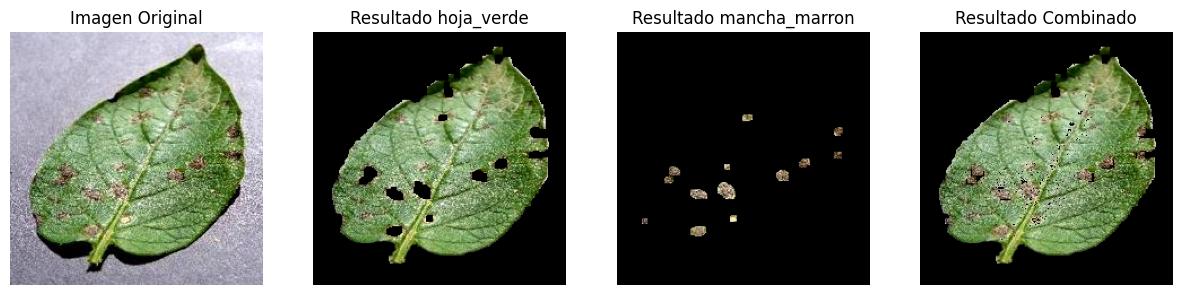

In [16]:
# Usar la función con una imagen de ejemplo
input_image_path ='../data/processed/preprocessed_potato_leaf/Tizón temprano/imagen_0005.jpg'

resultados = segmentar_colores(input_image_path, rangos_colores)

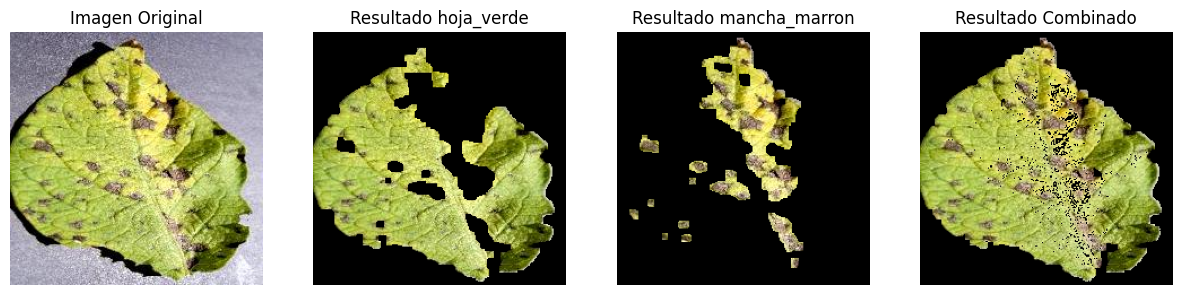

In [17]:
# Usar la función con una imagen de ejemplo
input_image_path ='../data/processed/preprocessed_potato_leaf/Tizón temprano/imagen_0010.jpg'

resultados = segmentar_colores(input_image_path, rangos_colores)

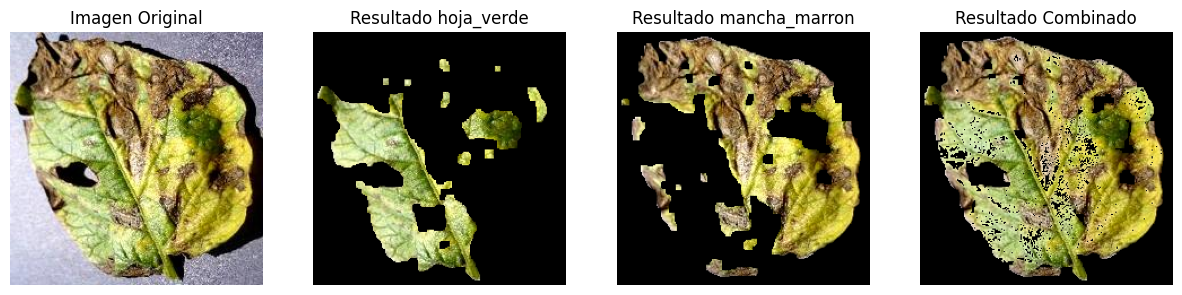

In [18]:
# Usar la función con una imagen de ejemplo
input_image_path ='../data/processed/preprocessed_potato_leaf/Tizón temprano/imagen_0110.jpg'

resultados = segmentar_colores(input_image_path, rangos_colores)

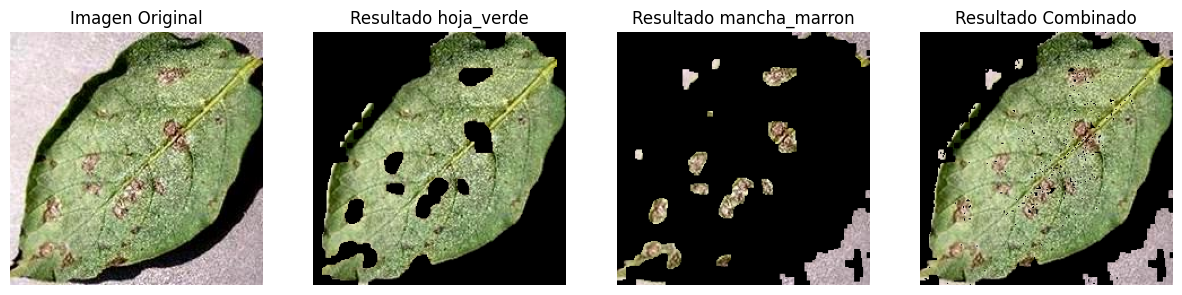

In [19]:
# Usar la función con una imagen de ejemplo
input_image_path ='../data/processed/preprocessed_potato_leaf/Tizón temprano/imagen_1010.jpg'

resultados = segmentar_colores(input_image_path, rangos_colores)